### Assumption of linear regression

<ol>
    <li> Linearity </li>
    <li> Homoscedasticity </li>
    <li> Mulitvariate Normality </li>
    <li> Independence of erros </li>
    <li> Lack of mulit-collinearity </li>
</ol>

#### Dummy variable trap

<li> N - categories have N-1 DOF. </li>
<li> N - dummy variables for N categories results in multi-collinearity </li>


### Importing dependency libraries and dataset

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values # iloc: index location
y = dataset.iloc[:, -1].values

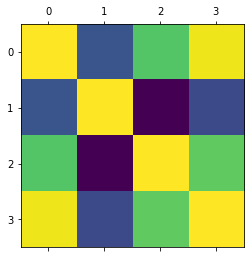

In [70]:
plt.matshow(dataset.corr())
plt.show()

In [71]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1,0.241955,0.724248,0.9729
Administration,0.241955,1,-0.0321539,0.200717
Marketing Spend,0.724248,-0.0321539,1,0.747766
Profit,0.9729,0.200717,0.747766,1


### Encoding categorical data

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
# transformers = list of transformer tuples (name, transformer, columns)
# transformer = instance of the transformer
# columns = columns, we want to transformer
# returns ColumnTransformer instance

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [73]:
X[:5]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

### Training and Testing

 - We have 3 columns for 3 categories.
 - Clearly, one of them is redundent.

LinearRegression Class will by default avoid this trap.

LinearRegression Class will also identify the best features <br>
(the features which have the highest p-values and so are the most <br>
statistically significant).

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [75]:
from sklearn.linear_model import LinearRegression

# return untrained model (with unitialized or random parameters - regression coefficients in this case)
regressor = LinearRegression()
regressor.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Predicting the test results

In [76]:
y_predicted = regressor.predict(X_test)
r2Score = regressor.score(X_test, y_test)

print(regressor.coef_)
print(regressor.intercept_)

r2Score

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.529248549545


0.9347068473282218

In [77]:
from sklearn.metrics import mean_squared_error, r2_score
r2Score = r2_score(y_test, y_predicted)
r2Score

0.9347068473282218

In [78]:
np.set_printoptions(precision=2)
y_predicted = np.reshape(y_predicted, newshape=(len(y_predicted), 1))
y_test = np.reshape(y_test, newshape=(len(y_test), 1))

# https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
np.concatenate((y_predicted, y_test), 1)

array([[103015.2 , 103282.38],
       [132582.28, 144259.4 ],
       [132447.74, 146121.95],
       [ 71976.1 ,  77798.83],
       [178537.48, 191050.39],
       [116161.24, 105008.31],
       [ 67851.69,  81229.06],
       [ 98791.73,  97483.56],
       [113969.44, 110352.25],
       [167921.07, 166187.94]])

### Cross-Validation

<a href="https://scikit-learn.org/stable/modules/cross_validation.html"> Cross validation </a>

In [79]:
from sklearn.model_selection import cross_val_score, cross_validate

In [80]:
scores = cross_validate(estimator=regressor, X=X, y=y)

C:\Users\Harry\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [81]:
scores

C:\Users\Harry\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0., 0., 0.]),
 'score_time': array([0., 0., 0.]),
 'test_score': array([0.79, 0.51, 0.66]),
 'train_score': array([0.89, 0.96, 0.95])}